## Getting the datasets

In [1]:
#Modify this code again, how should I adapt it for the 

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib
import anndata

import scanpy as sc
import cell2cell as c2c

import liana as li
import plotnine as p9

from tqdm.auto import tqdm

from tqdm.auto import tqdm
from anndata import read_h5ad
import sys

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing datasets
path = f"/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Liana+/rank_aggregate/Liana_RA_subsetTULB/anndata_subsetTULB"

path_TU01 = f"{path}/TU01plusLB_chuvio.h5ad"
path_TUMIN01 = f"{path}/TU_MINUS01plusLB_chuvio.h5ad"

path = f"/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Liana+/rank_aggregate/Liana_RA_subsetTULB/anndata_subsetTULB"

path_TU01L1_2 = f"{path}/TU01plusLB_chuvioL1_2.h5ad"
path_TUMIN01L1_2 = f"{path}/TU_MINUS01plusLB_chuvioL1_2.h5ad"



In [4]:
# importing datasets
TU01 = sc.read_h5ad(path_TU01)
TUMIN01 = sc.read_h5ad(path_TUMIN01)

TU01_L1_2 = sc.read_h5ad(path_TU01L1_2)
TUMIN01_L1_2 = sc.read_h5ad(path_TUMIN01L1_2)

In [5]:
#We need to remove one set of MB cells other wise we are getting doubles. 
mask = (TU01.obs['singler_annotation'] == "Tu_L1_SFTPB")
TU01 = TU01[mask]

mask_L1_2 = (TU01_L1_2.obs['singler_annotation'] == "Tu_L1_SFTPB")
TU01_L1_2 = TU01_L1_2[mask_L1_2]

In [6]:
#Coding the distance for later usage in context

#short distance TU
TU01.obs['distance_code'] = "TU01"
TU01_L1_2.obs['distance_code'] = "TU01"

#long distance TU

TUMIN01.obs.loc[TUMIN01.obs['singler_annotation'] == 'B cells', 'distance_code'] = 'LB'
TUMIN01_L1_2.obs.loc[TUMIN01_L1_2.obs['singler_annotation'] == 'B cells', 'distance_code'] = 'LB'

TUMIN01.obs.loc[TUMIN01.obs['singler_annotation'] == 'Tu_L1_SFTPB', 'distance_code'] = 'TUMIN01'
TUMIN01_L1_2.obs.loc[TUMIN01_L1_2.obs['singler_annotation'] == 'Tu_L1_SFTPB', 'distance_code'] = 'TUMIN01'

In [7]:
TUMIN01.obs

,orig.ident,nCount_originalexp,nFeature_originalexp,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,...,total,libsize_drop,sizeFactor,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,singler_annotation,ident,distance_code
L1_1_aancceck-1,L1,62.0,44,L1_1_aancceck-1,829.782898,2267.540283,62,0,0,0,...,62.0,False,0.377651,102.0,46,18,18,B cells,18,LB
L1_1_aaogoanh-1,L1,95.0,41,L1_1_aaogoanh-1,1522.419922,2535.144043,95,0,0,0,...,95.0,False,0.578659,119.0,40,17,17,B cells,17,LB
L1_1_afabaglh-1,L1,274.0,69,L1_1_afabaglh-1,4286.381836,2525.005615,275,2,0,4,...,275.0,False,1.668975,158.0,64,0,0,Tu_L1_SFTPB,0,TUMIN01
L1_1_afabdaal-1,L1,156.0,51,L1_1_afabdaal-1,4290.021973,2535.877441,156,0,0,1,...,156.0,False,0.950219,150.0,51,9,9,Tu_L1_SFTPB,9,TUMIN01
L1_1_afacaejk-1,L1,98.0,35,L1_1_afacaejk-1,4283.412598,2538.297119,98,0,0,0,...,98.0,False,0.596933,132.0,35,3,3,Tu_L1_SFTPB,3,TUMIN01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L1_1_nmlhfadj-1,L1,144.0,74,L1_1_nmlhfadj-1,3073.287598,1412.620361,144,0,0,0,...,144.0,False,0.877126,135.0,72,17,17,B cells,17,LB
L1_1_nodocopg-1,L1,108.0,62,L1_1_nodocopg-1,3210.466309,1087.051758,108,0,0,2,...,108.0,False,0.657844,122.0,61,9,9,B cells,9,LB
L1_1_obfcpaga-1,L1,114.0,66,L1_1_obfcpaga-1,2903.577148,1445.370483,114,0,0,0,...,114.0,False,0.694391,120.0,63,17,17,B cells,17,LB
L1_1_odklikdm-1,L1,167.0,89,L1_1_odklikdm-1,3101.012695,1202.376953,168,0,0,1,...,168.0,False,1.017222,154.0,87,9,9,B cells,9,LB


In [8]:
#concatenate the objects :
L1_1 = anndata.concat([TU01, TUMIN01])
L1_2 = anndata.concat([TU01_L1_2, TUMIN01_L1_2])

In [9]:
#Removing the far ones from the first sample and the close ones from the second. 
mask_L1_1 = L1_1.obs['distance_code'].isin(["TU01", "LB"])
filtered_L1_1 = L1_1[mask_L1_1]

mask_L1_2 = L1_2.obs['distance_code'].isin(["TUMIN01", "LB"])
filtered_L1_2 = L1_2[mask_L1_2]

In [10]:
L1_2 = filtered_L1_2
L1_1 = filtered_L1_1

### add sample code and concatenate the samples

In [11]:
# add the sample code 
L1_1.obs["sample"] = "L1_1"
L1_2.obs["sample"] = "L1_2"

In [12]:
#concatenate the samples :
adata = anndata.concat([L1_1, L1_2], index_unique=None, join='outer')

In [13]:
adata

AnnData object with n_obs × n_vars = 1126 × 318
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident', 'distance_code', 'sample'
    obsm: 'PCA', 'TSNE', 'UMAP', 'spatial'
    layers: 'counts', 'logcounts'

### OUT dot plot

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


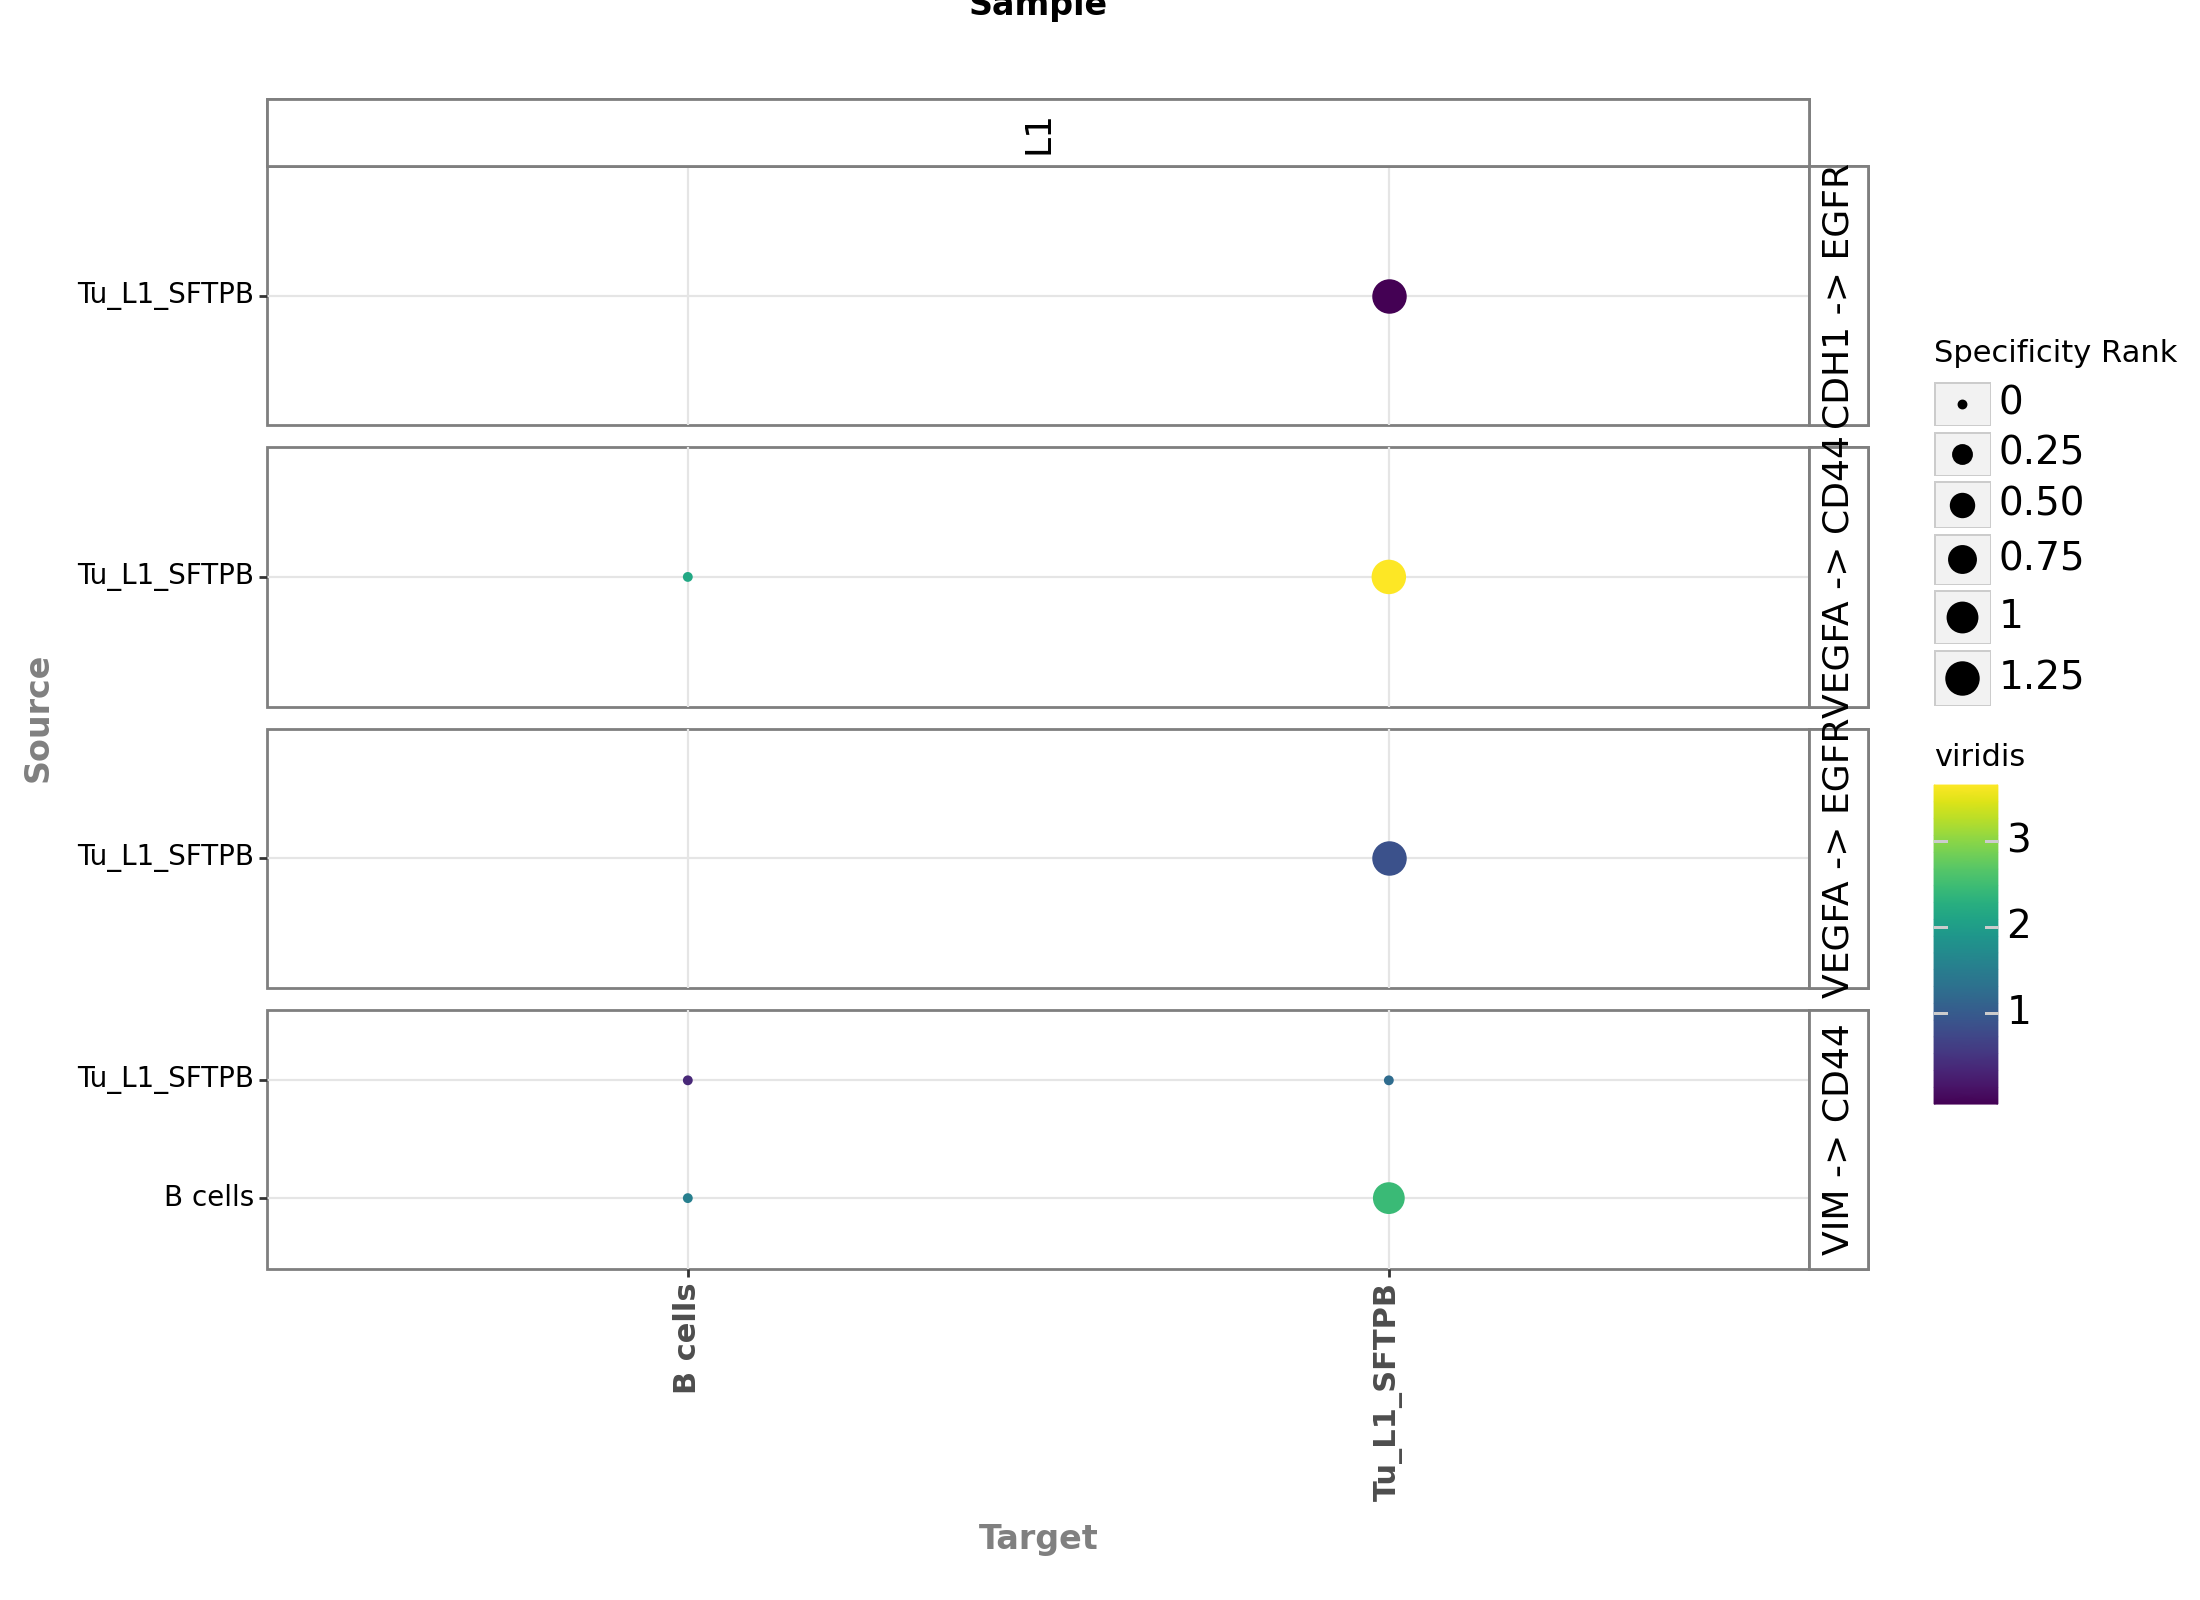

<Figure Size: (1100 x 800)>

In [45]:
plot = (li.pl.dotplot_by_sample(adata=adata,
                               colour='magnitude_rank',
                               size='specificity_rank',
                               source_labels=["Tu_L1_SFTPB", "B cells"],
                               target_labels=["Tu_L1_SFTPB", "B cells"],
                               ligand_complex = ['VIM', 'VEGFA', 'CDH1', 'CXCL12'],
                               receptor_complex= ['CD44', 'IFITM1', 'EGFR', 'CD19'],
                               sample_key='sample',
                               inverse_colour=True,
                               inverse_size=True,
                               figure_size=(11, 8),
                               size_range=(1, 6),
                               ) +
         p9.labs(color='Magnitude rank', size='Specificity Rank'))

plot.save(output_folder + '/Dotplot-by-sample.pdf', height=8, width=11)
plot

## 2.6 RUN Liana by sample 

## 1 Initial Setup

In [14]:
data_folder = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astearAnalysis/TensorC2C/data/liana-outputs/'
output_folder = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/'
c2c.io.directories.create_directory(output_folder)

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/ already exists.


In [15]:
li.mt.rank_aggregate.by_sample(adata,
                                   sample_key='sample',
                                   groupby='singler_annotation',
                                   resource_name = 'consensus',
                                   expr_prop=0.1, # must be expressed in expr_prop fraction of cells
                                   min_cells = 5,
                                   n_perms = 100,
                                   use_raw = False, # run on log- and library-normalized counts
                                   verbose = True,
                                   inplace = True
                                  )

Converting `sample` to categorical!
Now running: L1_2: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


In [16]:
liana_res = adata.uns['liana_res']

## 3.2 Create 4D-Communication Tensor

Specifying the context. In the original they have 12 samples and the first letter tells them if it is Control or sick, so the following ordering operation allows it to setup the order of samples depending on the context. We jsut want to see the dfference between L4 that has two LSE and the others. 

In [17]:
sorted_samples = sorted(adata.obs['sample'].unique())

In [18]:
sorted_samples

['L1_1', 'L1_2']

## 3.3 Generate tensor

To generate the 4D-communication tensor, we will to create matrices with the communication scores for each of the ligand-receptor pairs within the same sample, then generate a 3D tensor for each sample, and finally concatenate them to form the 4D tensor.

Briefly, we use the LIANA dataframe and communication scores to organize them as follows:
-> If you used a pipeline that generated negative scores, replace these with 0,  Otherwise, by default, Tensor-cell2cell will treat these as NaN.
-> ...

In [19]:
adata.X

<1126x318 sparse matrix of type '<class 'numpy.float64'>'
	with 54133 stored elements in Compressed Sparse Row format>

In [20]:
#Here we use the magnitude score but we could use the specificity score, in score_key. Also try lowering the outer_fraction value for rare occurences
tensor = li.multi.to_tensor_c2c(liana_res=liana_res, # LIANA's dataframe containing results
                                sample_key='sample', # Column name of the samples
                                source_key='source', # Column name of the sender cells
                                target_key='target', # Column name of the receiver cells
                                ligand_key='ligand_complex', # Column name of the ligands
                                receptor_key='receptor_complex', # Column name of the receptors
                                score_key='magnitude_rank', # Column name of the communication scores to use
                                non_negative = True, # set negative values to 0
                                inverse_fun=lambda x: 1 - x, # Transformation function
                                non_expressed_fill=None, # Value to replace missing values with
                                how='outer', # What to include across all samples
                                lr_fill=np.nan, # What to fill missing LRs with
                                cell_fill = np.nan, # What to fill missing cell types with
                                outer_fraction=1/10., # Fraction of samples as threshold to include cells and LR pairs.
                                lr_sep='^', # How to separate ligand and receptor names to name LR pair
                                context_order=sorted_samples, # Order to store the contexts in the tensor
                                sort_elements=True # Whether sorting alphabetically element names of each tensor dim. Does not apply for context order if context_order is passed.
                               )

100%|██████████| 2/2 [00:00<00:00, 22.09it/s]


In [21]:
from collections import defaultdict

element_dict = defaultdict(lambda: 'Unknown')

In [24]:
adata.obs

,orig.ident,nCount_originalexp,nFeature_originalexp,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,...,libsize_drop,sizeFactor,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,singler_annotation,ident,distance_code,sample
L1_1_aannhgnn-1,L1,225.0,68,L1_1_aannhgnn-1,1518.480713,2547.041260,225,0,0,2,...,False,1.370509,154.0,66,2,2,Tu_L1_SFTPB,2,TU01,L1_1
L1_1_aaofalmf-1,L1,549.0,95,L1_1_aaofalmf-1,1526.243408,2559.840088,549,2,0,7,...,False,3.344041,146.0,47,2,2,Tu_L1_SFTPB,2,TU01,L1_1
L1_1_abbbalbl-1,L1,394.0,83,L1_1_abbbalbl-1,1508.511963,2547.436279,394,3,0,3,...,False,2.399913,145.0,49,0,0,Tu_L1_SFTPB,0,TU01,L1_1
L1_1_abbbokin-1,L1,248.0,72,L1_1_abbbokin-1,1498.367310,2550.417480,249,0,0,2,...,False,1.510605,156.0,67,2,2,Tu_L1_SFTPB,2,TU01,L1_1
L1_1_afnoeone-1,L1,78.0,36,L1_1_afnoeone-1,1653.678833,2940.203857,78,0,0,0,...,False,0.475110,134.0,36,0,0,Tu_L1_SFTPB,0,TU01,L1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L1_2_ngkapnkl-1,L1,49.0,36,L1_2_ngkapnkl-1,1334.134644,1611.725952,49,0,0,0,...,False,0.288047,98.0,46,3,3,B cells,3,LB,L1_2
L1_2_ngkchjjk-1,L1,32.0,24,L1_2_ngkchjjk-1,1322.206299,1620.873535,32,0,0,0,...,False,0.188112,100.0,41,7,7,B cells,7,LB,L1_2
L1_2_npafinjp-1,L1,50.0,36,L1_2_npafinjp-1,3001.963623,1366.840332,50,1,0,0,...,False,0.293925,98.0,42,21,21,B cells,21,LB,L1_2
L1_2_ogggnmkm-1,L1,65.0,42,L1_2_ogggnmkm-1,2665.940918,1034.834839,65,0,0,1,...,False,0.382103,114.0,40,21,21,B cells,21,LB,L1_2


In [22]:
#Here the goal is to set the distance code as the context !
context_dict = adata.obs.set_index('orig.ident')['distance_code'].sort_values().to_dict()

In [29]:
element_dict

defaultdict(<function __main__.<lambda>()>, {})

In [25]:
context_dict = element_dict.copy()

In [28]:
context_dict

defaultdict(<function __main__.<lambda>()>,
            {'L1_1': 'closest 1% TU cells', 'L1_2': 'furthest 1% TU cells'})

In [26]:
sorted_samples

['L1_1', 'L1_2']

In [27]:
context_dict.update({'L1_1' : 'closest 1% TU cells',
                     'L1_2' : 'furthest 1% TU cells',
                     })
dimensions_dict = [context_dict, None, None, None]

In [288]:
#liana_res

## 3.5 Prepare Tensor Metadata -> Selecting the context

In [289]:
adata.obs

,orig.ident,nCount_originalexp,nFeature_originalexp,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,...,libsize_drop,sizeFactor,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,singler_annotation,ident,distance_code,sample
L1_1_aannhgnn-1,L1,225.0,68,L1_1_aannhgnn-1,1518.480713,2547.041260,225,0,0,2,...,False,1.370509,154.0,66,2,2,Tu_L1_SFTPB,2,TU01,L1_1
L1_1_aaofalmf-1,L1,549.0,95,L1_1_aaofalmf-1,1526.243408,2559.840088,549,2,0,7,...,False,3.344041,146.0,47,2,2,Tu_L1_SFTPB,2,TU01,L1_1
L1_1_abbbalbl-1,L1,394.0,83,L1_1_abbbalbl-1,1508.511963,2547.436279,394,3,0,3,...,False,2.399913,145.0,49,0,0,Tu_L1_SFTPB,0,TU01,L1_1
L1_1_abbbokin-1,L1,248.0,72,L1_1_abbbokin-1,1498.367310,2550.417480,249,0,0,2,...,False,1.510605,156.0,67,2,2,Tu_L1_SFTPB,2,TU01,L1_1
L1_1_afnoeone-1,L1,78.0,36,L1_1_afnoeone-1,1653.678833,2940.203857,78,0,0,0,...,False,0.475110,134.0,36,0,0,Tu_L1_SFTPB,0,TU01,L1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L1_2_ngkapnkl-1,L1,49.0,36,L1_2_ngkapnkl-1,1334.134644,1611.725952,49,0,0,0,...,False,0.288047,98.0,46,3,3,B cells,3,LB,L1_2
L1_2_ngkchjjk-1,L1,32.0,24,L1_2_ngkchjjk-1,1322.206299,1620.873535,32,0,0,0,...,False,0.188112,100.0,41,7,7,B cells,7,LB,L1_2
L1_2_npafinjp-1,L1,50.0,36,L1_2_npafinjp-1,3001.963623,1366.840332,50,1,0,0,...,False,0.293925,98.0,42,21,21,B cells,21,LB,L1_2
L1_2_ogggnmkm-1,L1,65.0,42,L1_2_ogggnmkm-1,2665.940918,1034.834839,65,0,0,1,...,False,0.382103,114.0,40,21,21,B cells,21,LB,L1_2


In [290]:
meta_tensor = c2c.tensor.generate_tensor_metadata(interaction_tensor=tensor,
                                              metadata_dicts=[context_dict, None, None, None],
                                              fill_with_order_elements=True
                                             )

In [291]:
pd.__version__

'2.2.0'

In [292]:
tensor.shape

(2, 34, 2, 2)

## 3.6 Exporting tensors

In [293]:
c2c.io.export_variable_with_pickle(tensor, output_folder + 'BALF-Tensor-L1_TU_LB_16_04_24.pkl')

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/BALF-Tensor-L1_TU_LB_16_04_24.pkl  was correctly saved.


In [294]:
c2c.io.export_variable_with_pickle(meta_tensor, output_folder + 'BALF-Tensor-L1_TU_LB-Metadata_16_04_24.pkl')

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/BALF-Tensor-L1_TU_LB-Metadata_16_04_24.pkl  was correctly saved.


## 4. Running Tensor-cell2cell to perform a tensor factorization

In [ ]:
# done in the cluster

## OUT dot plots of the Liana rankings

In [53]:
plot = (li.pl.dotplot(adata=adata,
                               colour='magnitude_rank',
                               size='specificity_rank',
                               source_labels=["Tu_L1_SFTPB", "B cells"],
                               target_labels=["Tu_L1_SFTPB", "B cells"],
                               sample_key='sample',
                               inverse_colour=True,
                               inverse_size=True,
                                top_n=20,
                               figure_size=(11, 8),
                               size_range=(1, 6),
                               ) +
         p9.labs(color='Magnitude rank', size='Specificity Rank'))

plot.save(output_folder + '/Dotplot-by-sample.pdf', height=8, width=11)
plot

SyntaxError: unmatched ']' (3297004793.py, line 1)

In [68]:
from plotnine import ggsave

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


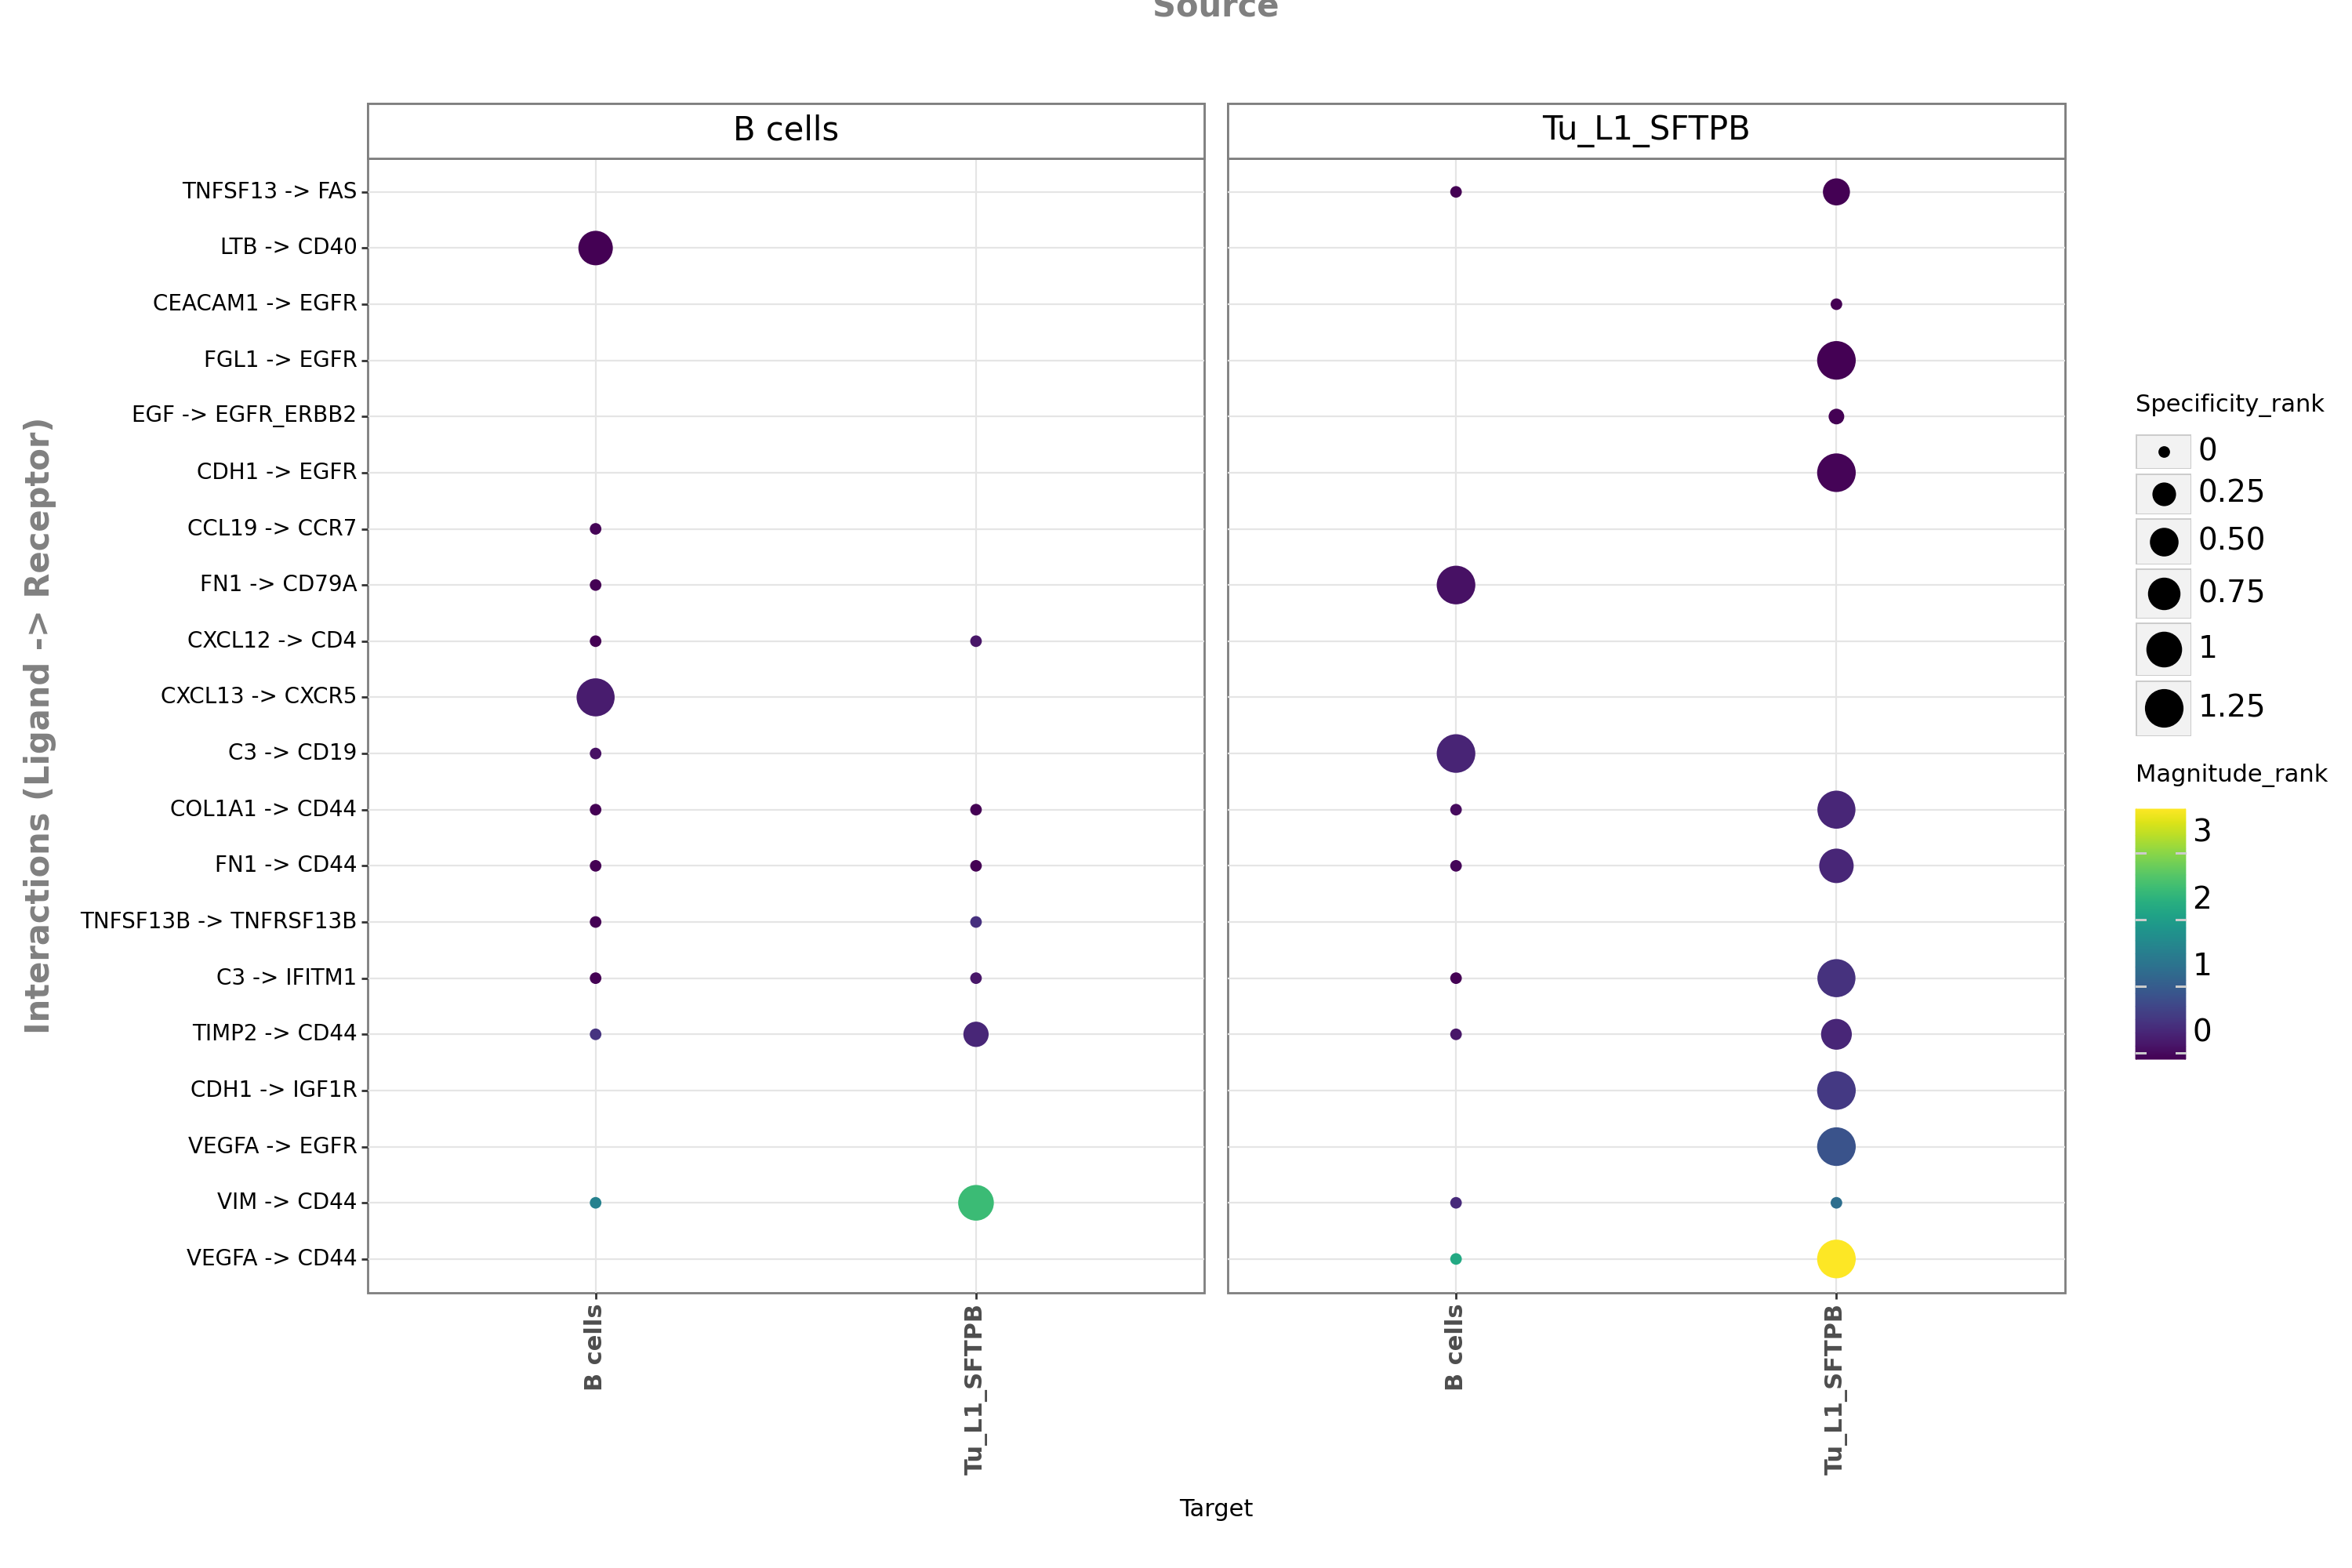

<Figure Size: (1500 x 1000)>

In [76]:
li.pl.dotplot(
    adata=adata,
    colour="magnitude_rank",
    size="specificity_rank",
    inverse_colour=True,  # we inverse sign since we want small p-values to have large sizes
    inverse_size=True,
    # We choose only the cell types which we wish to plot
    source_labels=["Tu_L1_SFTPB", "B cells"],
    target_labels=["Tu_L1_SFTPB", "B cells"],
    # since the rank_aggregate can also be interpreted as a probability distribution
    # we can again filter them according to their specificity significance
    # yet here the interactions are filtered according to
    # how consistently highly-ranked is their specificity across the methods
    #filterby="specificity_rank",
    #filter_lambda=lambda x: x <= 0.05,
    # again, we can also further order according to magnitude
    orderby="magnitude_rank",
    orderby_ascending=True,  # prioritize those with lowest values
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(15, 10)
)

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


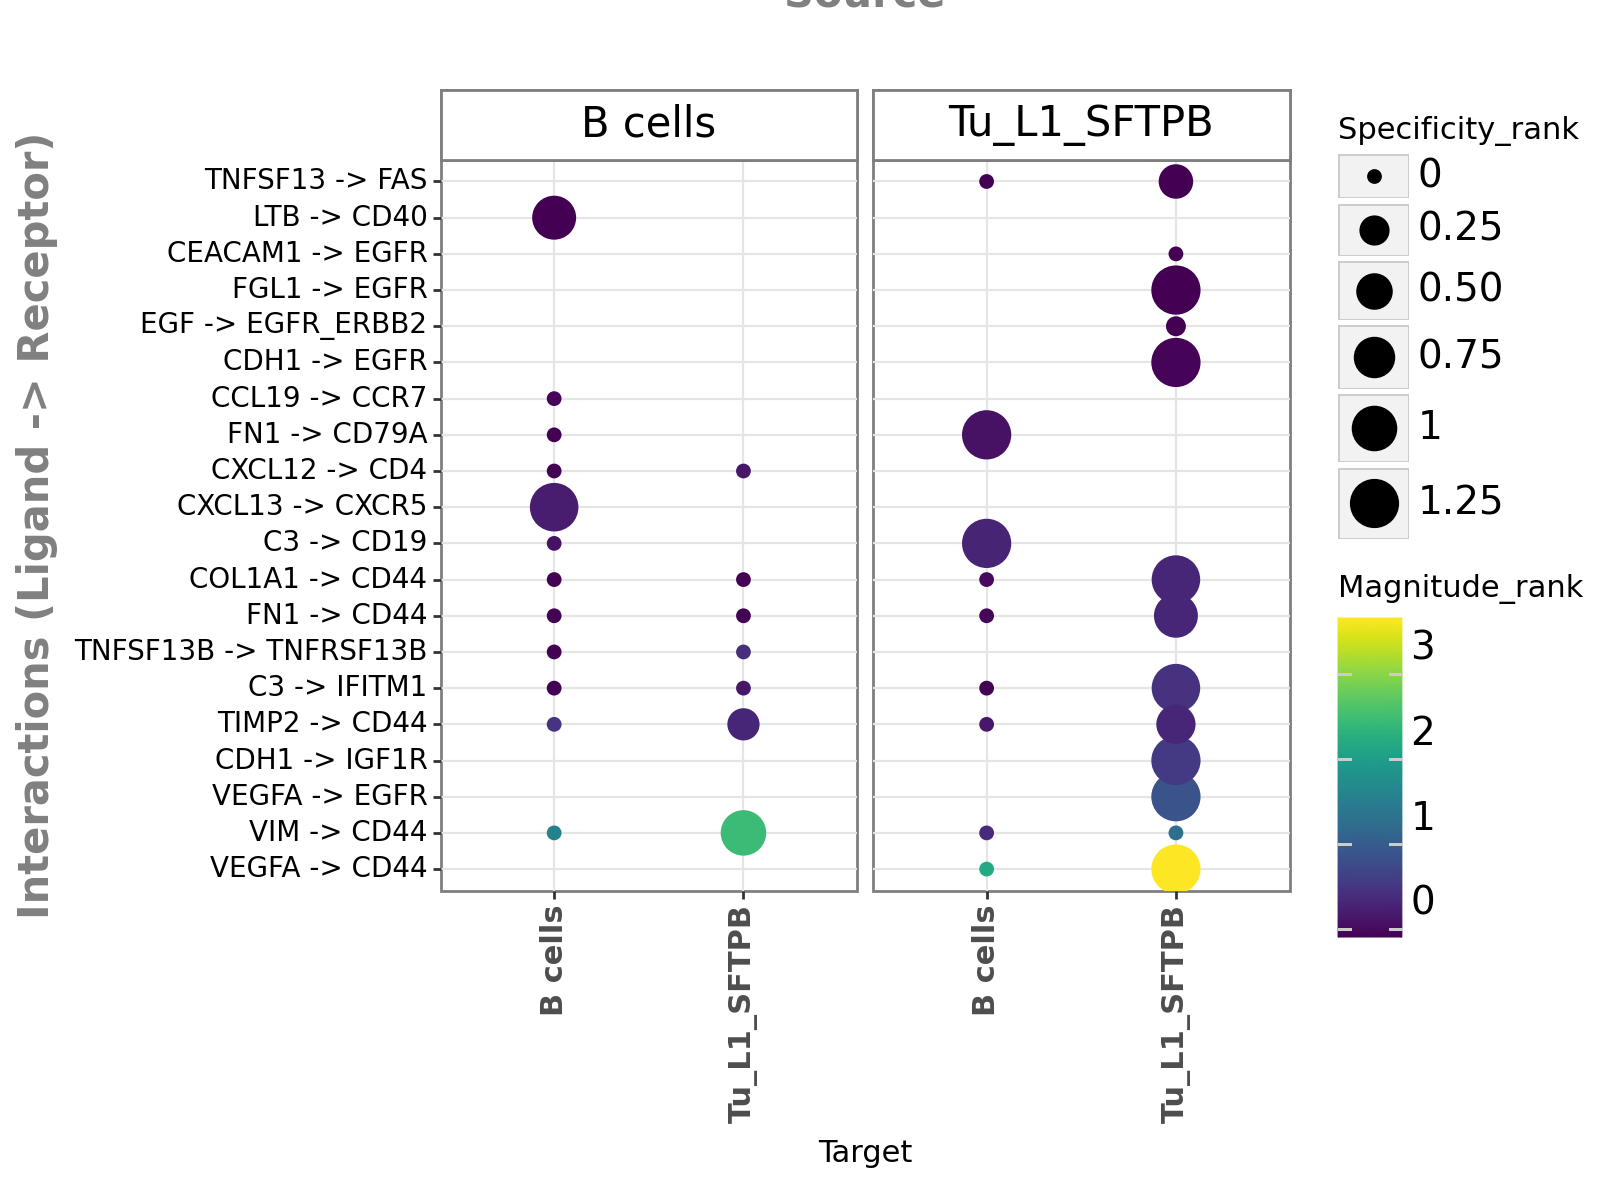

<Figure Size: (800 x 600)>

In [65]:
plotL1

## 5. Downstream Analyses of Factor Loadings

In [2]:
import cell2cell as c2c

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
output_folder = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/'
c2c.io.directories.create_directory(output_folder)

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/ already exists.


In [11]:
factors = c2c.io.load_tensor_factors(output_folder + 'Loadings_TU_LB_16_04_24.xlsx')

In [12]:
from collections import defaultdict

element_dict = defaultdict(lambda: 'Unknown')

In [13]:
context_dict = element_dict.copy()

context_dict.update({'L1_1' : 'closest 1% TU cells',
                     'L1_2' : 'furthest 1% TU cells'
                    })

### Downstream Analysis

AttributeError: module 'seaborn.categorical' has no attribute '_BoxPlotter'

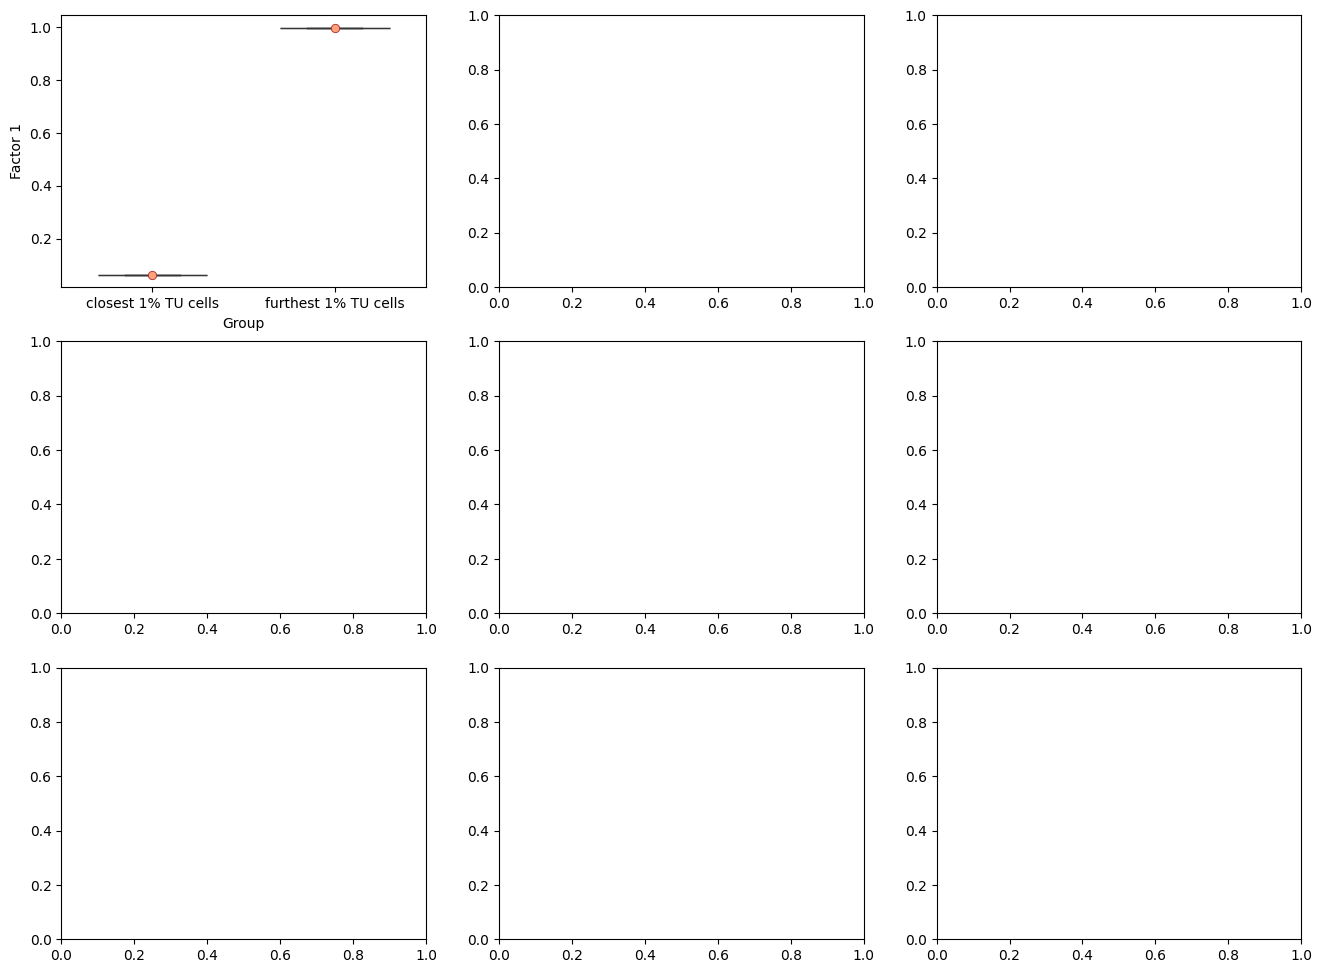

In [16]:
groups_order = ['closest 1% TU cells', 'furthest 1% TU cells']
fig_filename = output_folder + '/BALF-Severity-Boxplots.pdf'

_ = c2c.plotting.context_boxplot(context_loadings=factors['Contexts'],
                                 metadict=context_dict,
                                 nrows=3,
                                 figsize=(16, 12),
                                 group_order=groups_order,
                                 statistical_test='t-test_ind',
                                 pval_correction='fdr_bh',
                                 cmap='plasma',
                                 verbose=False,
                                 filename=fig_filename
                                )

In [ ]:
def severity_rank(x):
    if x == ''closest 1% TU cells'':
        ranking = 1
    elif x == 'Moderate COVID-19':
        ranking = 2
    elif x == 'Severe COVID-19':
        ranking = 3
    return ranking